# Iris Classification

## EDA Notebook

This notebook uses the training data to conduct exploratory data analysis (EDA).

Data will be loaded and merged. Mapping will match target values to species labels.

Both summary stats and visualization offer insight into patterns and relationships.

Some steps shown here are for example only given the cleanliness of the data (e.g., no missing data).

**NOTE:** EDA is done on training data as that is the data the model will be built with. Inaccurate assumptions or associations may arise if test data is not withheld. 

In [1]:
import os
import pandas as pd
import seaborn as sns
import plotly.express as px
from skimpy import skim, skim_get_figure

In [3]:
# Set data path
data_path = os.path.join('..', 'data')
# Set img path
img_path = os.path.join('..', 'imgs')
# Create img dir if not there
os.makedirs(img_path, exist_ok=True)

In [4]:
# Create X and y file paths
X_train_data_path = os.path.join(data_path, 'X_train.csv')
y_train_data_path = os.path.join(data_path, 'y_train.csv')

In [5]:
# Read in data
X_train = pd.read_csv(X_train_data_path)
y_train = pd.read_csv(y_train_data_path)

In [6]:
# Combine X and y so labels can be used
df = pd.concat([X_train, y_train], axis=1)

In [7]:
# Create dictionary mapping target values to actual species names
target_mapping = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}
# Create new column where value comes from target_mapping dict based on target value
df['species'] = df['target'].map(target_mapping)
# Check species values and counts
df.species.value_counts()

species
setosa        34
virginica     33
versicolor    33
Name: count, dtype: int64

## Summary Statistics

- Pandas methods:
    - [info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)
    - [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
- Skim report

In [19]:
# Built-in pandas function, returns None
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   species            100 non-null    object 
 5   target             100 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


In [22]:
# Built-in pandas function, returns df
df_desc = df.describe()
df_desc

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.883000,3.074000,3.764000,1.199000,0.990000
std,0.856827,0.458284,1.784134,0.776224,0.822598
min,4.300000,2.000000,1.100000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.425000,3.400000,5.100000,1.825000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# Set save path and generate skim report
skim_img_path = os.path.join(img_path, 'skim_summary.svg')
skim_get_figure(df, save_path=skim_img_path)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0   ┃ p25  ┃ p50  ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ sepal length (cm)      │   0 │      0 │   5.883 │   0.8568 │  4.3 │  5.1 │  5.8 │  6.425 │   7.9 │ ▃▇▇▇▅▂  │  │
│ │ sepal width (cm)       │   0 │      0 │   3.074 │   0.4583 │    2 │  2.8 │    3 │    3.4 │   4.4 │ ▁▇▇▇▂▁  │  │
│ │ petal length (cm)      │   0 │      0 │   3.764 │    1.784 │  1.1 │  1.6 │  4.3 │    5.1 │   6.9 │ ▇ ▂▆▅▂  │  │
│ │ petal width (cm)       │   0 │      0 │   1.199 │   0.7762 │  0.1 │  0.3 │  1.3 │  1.825 │   2.5 │ ▇ ▃▆▃▅  │  │
│ │ target                 │   0 │      0 │    0.99 │   0.8226 │    0 │    0 │    1 │      2 │     2 │ ▇  ▇ ▇  │  │
│ └────────────────────────┴─────┴────────┴─────────┴──────────┴──────┴──────┴──────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ species                   │       0 │          0 │                            1 │                      100 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Visualizations

In [24]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'target'],
      dtype='object')

In [26]:
feat_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [27]:
df_grouped=df.groupby('species')[feat_cols].mean()
df_grouped

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.000000,3.464706,1.488235,0.247059
versicolor,6.024242,2.730303,4.260606,1.315152
virginica,6.651515,3.015152,5.612121,2.063636


In [28]:
test = df_grouped.reset_index(drop=False, names=['species'])
test

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.000000,3.464706,1.488235,0.247059
1,versicolor,6.024242,2.730303,4.260606,1.315152
2,virginica,6.651515,3.015152,5.612121,2.063636


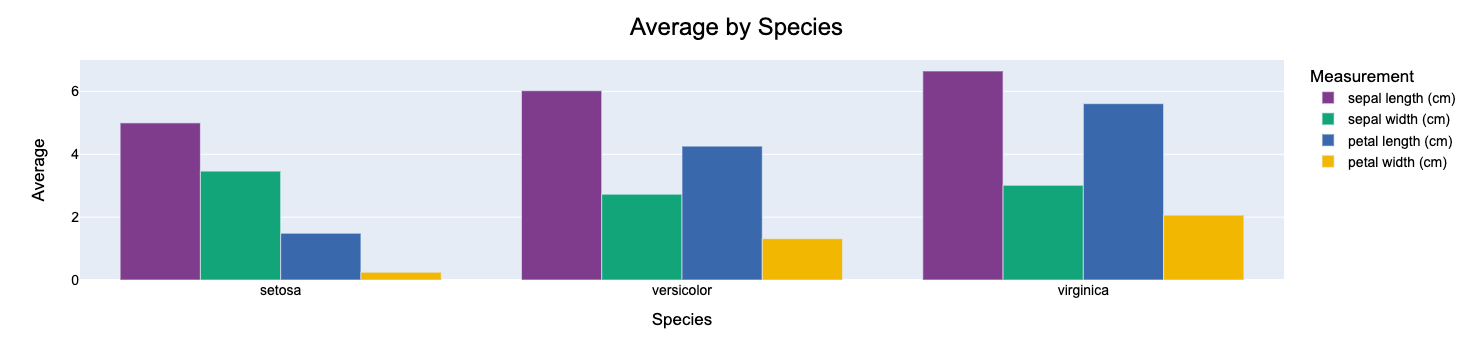

In [32]:
# Stacked bar graph showing counts by emotion
fig = px.bar(test, x="species", y=feat_cols, barmode='group',
            color_discrete_sequence=px.colors.qualitative.Bold)

fig = apply_default_plotly_styling(fig, title="Average by Species", xaxis_title="Species", yaxis_title="Average", legend_title="Measurement")
# fig = add_bar_totals(fig, emo_piv, 'TotalImages')

fig.show()
# fig.write_image("imgs/FER2013_count_bar.png")

In [30]:
def apply_default_plotly_styling(fig, title, xaxis_title=None, 
                          yaxis_title=None, legend_title=None):
    """ Function to update layout with consistent styling and flexible parameters

    Args:
        fig (plotly.graph_objects.Figure): Figure for formatting
        title (str): Main title for graph
        xaxis_title (str): Title for x-axis of graph
        yaxis_title (str): Title for y-axis of graph

    Returns:
        plotly.graph_objects.Figure: Plotly figure with updated formatting
    """    
    # Update layout for title and fonts
    fig.update_layout(
        title={
            'text': title,
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        font=dict(
            family="Arial, sans-serif",
            size=14,
            color="black"
        ),
        title_font=dict(size=24)
    )

    if xaxis_title is not None:
        fig.update_layout( xaxis_title=xaxis_title)

    if yaxis_title is not None:
        fig.update_layout(yaxis_title=yaxis_title)

    if legend_title is not None:
        fig.update_layout(legend_title_text=legend_title)
    
    return fig

In [23]:
# Create a bar chart using Plotly
# fig = px.bar(df_grouped, x=df_grouped.index, y="Mean")

# Display the bar chart
# fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target'] but received: Mean

In [ ]:
sns.pairplot(df)